# Data loading

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
plt.style.use('seaborn-v0_8-bright')

from sklearn.metrics import precision_recall_curve, average_precision_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
import scipy.stats as stats
import shap

from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('https://osf.io/download/kt7qp/')
df = df.sort_values(by='REFYEAR').reset_index(drop=True)
df

,SCODE,CCODE,DATAYEAR,COUNTRY,EVENTYEAR,STATUS,ARC,ARConset,EW,EWonset,GP,GPonset,RW,RWonset,LastInstYr,ARC_2YR,ARC_4YR,ARC_5YR,ARC_8YR,ARC_15YR,EW_2YR,EW_4YR,EW_5YR,EW_8YR,EW_15YR,GP_2YR,GP_4YR,GP_5YR,GP_8YR,GP_15YR,RW_2YR,RW_4YR,RW_5YR,RW_8YR,RW_15YR,INST_2YR,INST_4YR,INST_5YR,INST_8YR,INST_15YR,REFYEAR,democ,autoc,parcomp,exrec,pol_code,emp,region,nc1,nc2,nc3,nc4,nc5,s_StabilityYears,s_wb_life_exp,s_wb_gdppc,s_wb_imports,s_wb_exports,s_polity2,s_logim,s_logrgdpe,s_logpop,s_pop_dens,s_empfrac,s_logcsh_x,s_logncsh_m,s_ethnic_frac,s_religious_frac,s_nconfs,s_inc_wb_gdppc,s_inc_wb_imports,s_inc_wb_exports,s_inc_ethnic_frac,s_inc_religious_frac,s_inc_nconfs,s_inc_logim,s_inc_logrgdpe,s_inc_logpop,s_inc_logcsh_x,s_inc_logncsh_m,ONSET
0,AFG,700,1948,Afghanistan,1950,stable,False,False,False,False,False,False,False,False,1944,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,1949,0,10,1,1,auc,0.000000,5,False,False,False,False,False,-0.951558,-2.453196,-0.718076,-1.154370,-1.114148,-1.434013,1.585419,0.000000,-0.033329,-0.264628,0.000000,0.000000,0.000000,0.482881,-0.667924,-0.668429,0.078244,0.016814,-0.007131,0.126852,0.006091,-0.034902,0.201179,0.000000,-1.197351,0.000000,0.000000,False
1,BUL,355,1948,Bulgaria,1950,stable,False,False,False,False,False,False,False,False,1944,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,1949,0,7,1,3,auc,4.509542,3,False,False,False,False,False,-0.951558,0.603726,-0.243284,-0.238446,0.144375,-1.031687,0.997729,-0.123241,-0.076162,-0.127355,-0.309887,-1.311837,-1.614994,-0.680864,-0.557109,-0.668429,0.022388,-0.013695,-0.011818,0.189014,0.183842,-0.032221,0.086168,-0.599616,-1.167099,-0.040689,-0.059652,False
2,ISR,666,1948,Israel,1950,in-window,False,False,False,False,False,False,False,False,1944,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,1949,10,0,5,8,dem,0.532152,5,False,False,False,False,False,-0.951558,0.830753,0.417171,0.089346,-0.413535,1.248162,-0.087091,-0.848487,-1.199129,-0.149109,-0.376276,-0.749226,0.997527,-0.833774,-0.792190,-0.668429,0.053503,-0.012356,-0.012677,-0.054451,-0.231969,-0.029586,5.641519,-0.507025,-1.472105,-0.022368,-0.095083,False
3,USR,364,1948,USSR,1950,stable,False,False,False,False,False,False,False,False,1944,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,1949,0,9,1,3,auc,0.000000,3,False,False,False,False,False,-0.951558,0.336577,0.000000,0.000000,0.000000,-1.299904,-0.220788,0.000000,1.722450,-0.275888,0.000000,0.000000,0.000000,0.000000,0.000000,-0.668429,0.000000,0.000000,0.000000,0.000000,0.000000,-0.033700,0.227486,0.000000,-1.165380,0.000000,0.000000,False
4,BEL,211,1948,Belgium,1950,stable,False,False,False,False,False,False,False,False,1944,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,1949,10,0,5,8,dem,3.372742,3,False,False,False,False,False,-0.951558,0.639291,0.954576,0.213334,0.514936,1.248162,0.364338,0.283006,0.036052,0.418989,-0.373247,0.644929,0.698840,0.235626,-1.267035,-0.668429,0.046770,-0.012988,-0.012693,0.112994,1.796821,-0.033746,-0.029924,-0.412586,-1.133568,0.026703,-0.016999,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8133,ITA,325,2015,Italy,2017,in-window,False,False,False,False,False,False,False,False,1944,False,False,False,False,False,False,

In [3]:
df.columns

Index(['SCODE', 'CCODE', 'DATAYEAR', 'COUNTRY', 'EVENTYEAR', 'STATUS', 'ARC',
       'ARConset', 'EW', 'EWonset', 'GP', 'GPonset', 'RW', 'RWonset',
       'LastInstYr', 'ARC_2YR', 'ARC_4YR', 'ARC_5YR', 'ARC_8YR', 'ARC_15YR',
       'EW_2YR', 'EW_4YR', 'EW_5YR', 'EW_8YR', 'EW_15YR', 'GP_2YR', 'GP_4YR',
       'GP_5YR', 'GP_8YR', 'GP_15YR', 'RW_2YR', 'RW_4YR', 'RW_5YR', 'RW_8YR',
       'RW_15YR', 'INST_2YR', 'INST_4YR', 'INST_5YR', 'INST_8YR', 'INST_15YR',
       'REFYEAR', 'democ', 'autoc', 'parcomp', 'exrec', 'pol_code', 'emp',
       'region', 'nc1', 'nc2', 'nc3', 'nc4', 'nc5', 's_StabilityYears',
       's_wb_life_exp', 's_wb_gdppc', 's_wb_imports', 's_wb_exports',
       's_polity2', 's_logim', 's_logrgdpe', 's_logpop', 's_pop_dens',
       's_empfrac', 's_logcsh_x', 's_logncsh_m', 's_ethnic_frac',
       's_religious_frac', 's_nconfs', 's_inc_wb_gdppc', 's_inc_wb_imports',
       's_inc_wb_exports', 's_inc_ethnic_frac', 's_inc_religious_frac',
       's_inc_nconfs', 's_inc_logim',

In [4]:
df.shape

(8138, 81)

# EDA

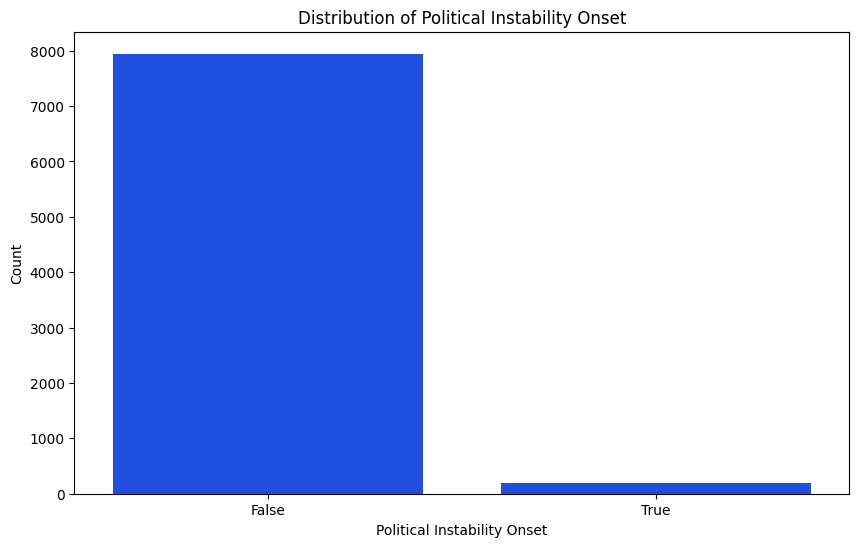

In [5]:
plt.figure(figsize=(10, 6))
sns.countplot(x='ONSET', data=df)
plt.title('Distribution of Political Instability Onset')
plt.xlabel('Political Instability Onset')
plt.ylabel('Count')
plt.savefig('political_instability_distribution.png', dpi=600, bbox_inches='tight')
plt.show()

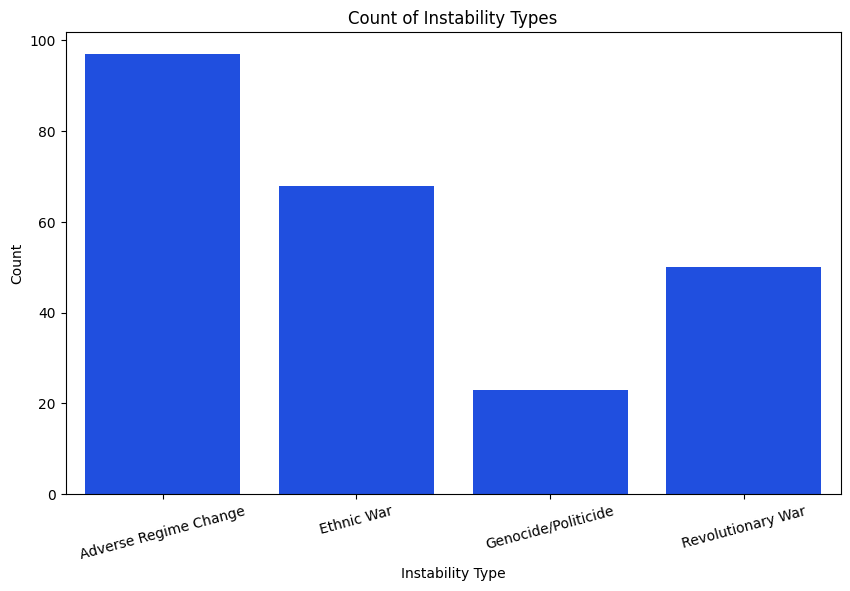

In [6]:
instability_types = ['ARC', 'EW', 'GP', 'RW']
instability_counts = df[instability_types].sum()

instability_labels = {
    'ARC': 'Adverse Regime Change',
    'EW': 'Ethnic War',
    'GP': 'Genocide/Politicide',
    'RW': 'Revolutionary War'
}

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=instability_counts.index, y=instability_counts.values)

ax.set_xticklabels([instability_labels[i] for i in instability_counts.index])

plt.title('Count of Instability Types')
plt.xlabel('Instability Type')
plt.ylabel('Count')
plt.xticks(rotation=15)

plt.savefig("instability_types_count.png", dpi=600, bbox_inches='tight')
plt.show()

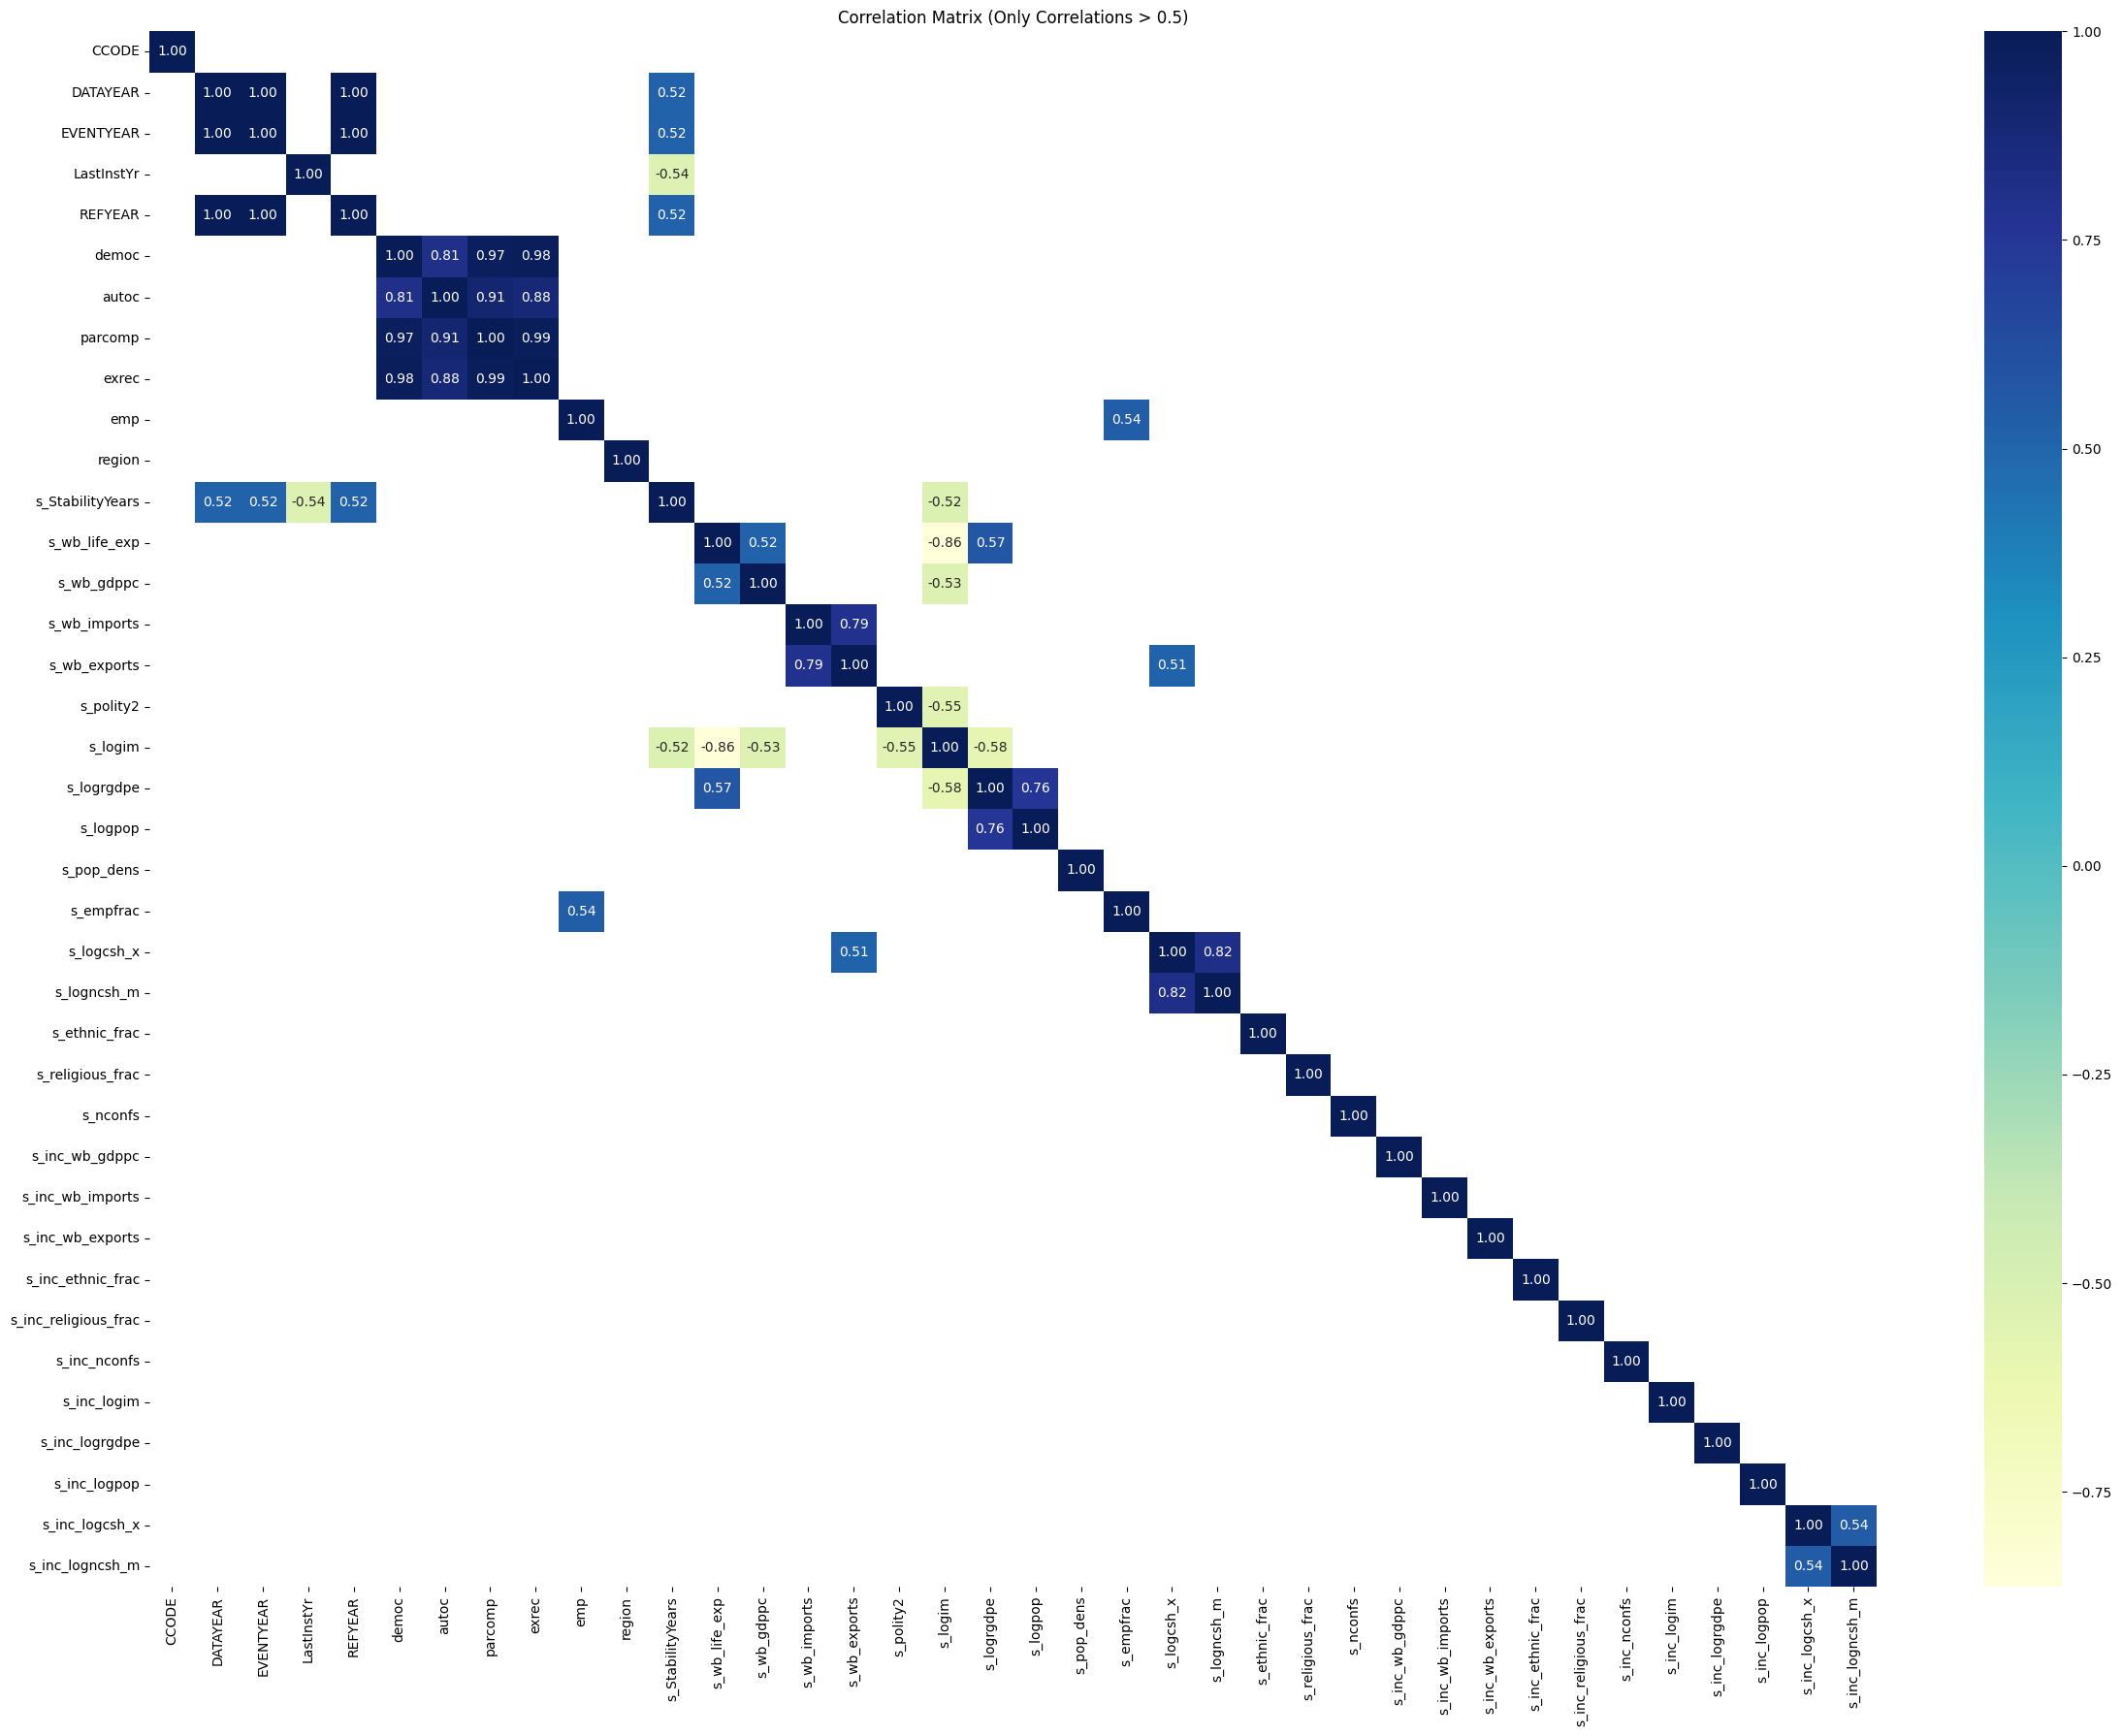

In [7]:
correlation_matrix = df.select_dtypes(include=['float64', 'int64']).corr()
plt.figure(figsize=(24, 18))
mask = np.abs(correlation_matrix) < 0.5
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu", fmt=".2f", mask=mask)
plt.title('Correlation Matrix (Only Correlations > 0.5)')
plt.tight_layout()
plt.show()

In [8]:
region_counts = df['region'].value_counts()
print(region_counts)
#1-Africa, 2-East Asia and Oceania, 3-Europe, 4-America, 5-Middle East, Central Asia

region
3    2257
1    2041
4    1402
2    1273
5    1165
Name: count, dtype: int64


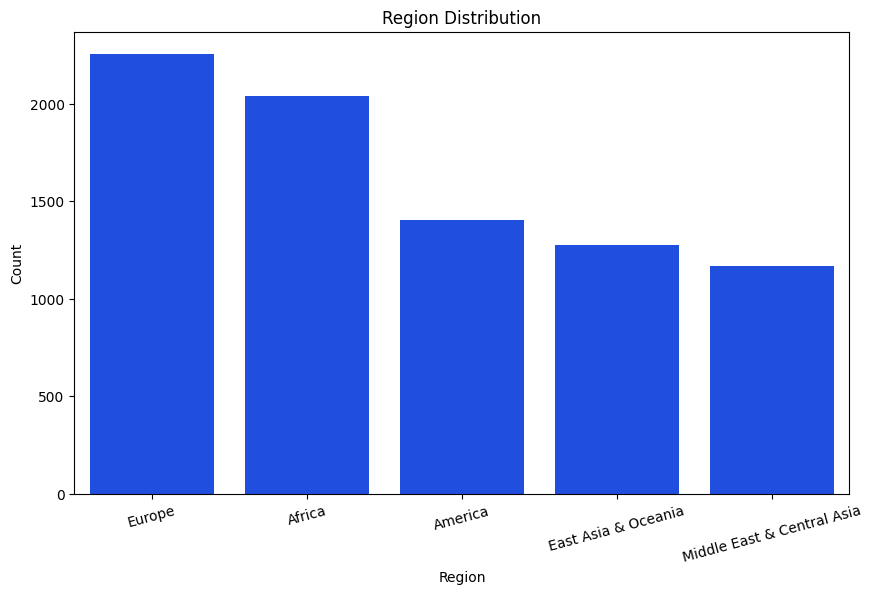

In [9]:
region_labels = {
    1: "Africa",
    2: "East Asia & Oceania",
    3: "Europe",
    4: "America",
    5: "Middle East & Central Asia"
}

plt.figure(figsize=(10, 6))
ax = sns.countplot(x='region', data=df, order=region_counts.index)

ax.set_xticklabels([region_labels[i] for i in region_counts.index])

plt.title('Region Distribution')
plt.xlabel('Region')
plt.ylabel('Count')
plt.xticks(rotation=15)
plt.show()

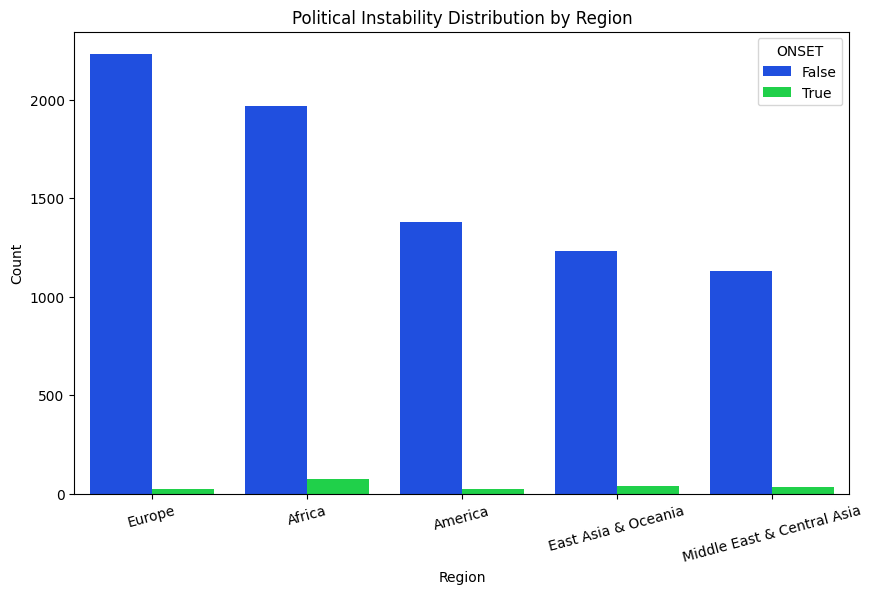

In [10]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='region', hue='ONSET', data=df, order=region_counts.index)

ax.set_xticklabels([region_labels[i] for i in region_counts.index])

plt.title('Political Instability Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.xticks(rotation=15)
plt.show()

In [11]:
region_onset_counts = df.groupby('region')['ONSET'].sum()
region_total_counts = df.groupby('region')['ONSET'].count()
region_onset_percent = (region_onset_counts / region_total_counts) * 100
print(region_onset_percent)

region
1    3.625674
2    3.063629
3    1.019052
4    1.783167
5    2.832618
Name: ONSET, dtype: float64


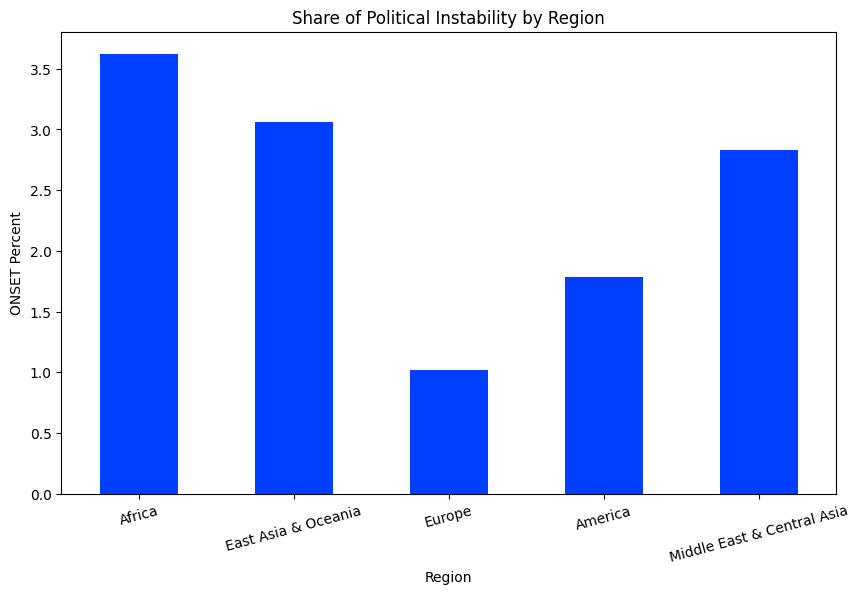

In [12]:
plt.figure(figsize=(10, 6))
ax = region_onset_percent.plot(kind='bar')

ax.set_xticklabels([region_labels[i] for i in region_onset_percent.index])

plt.title('Share of Political Instability by Region')
plt.ylabel('ONSET Percent')
plt.xlabel('Region')
plt.xticks(rotation=15)

plt.savefig("political_instability_by_region.png", dpi=600, bbox_inches='tight')
plt.show()

In [13]:
contingency_table = pd.crosstab(df['region'], df['ONSET'])

chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print(f"Chi-square: {chi2:.2f}")
print(f"P-value: {p:.8f}")

if p < 0.05:
    print("The relationship between region and ONSET is statistically significant.")
else:
    print("The relationship between region and ONSET is not statistically significant.")

Chi-square: 37.30
P-value: 0.00000016
The relationship between region and ONSET is statistically significant.


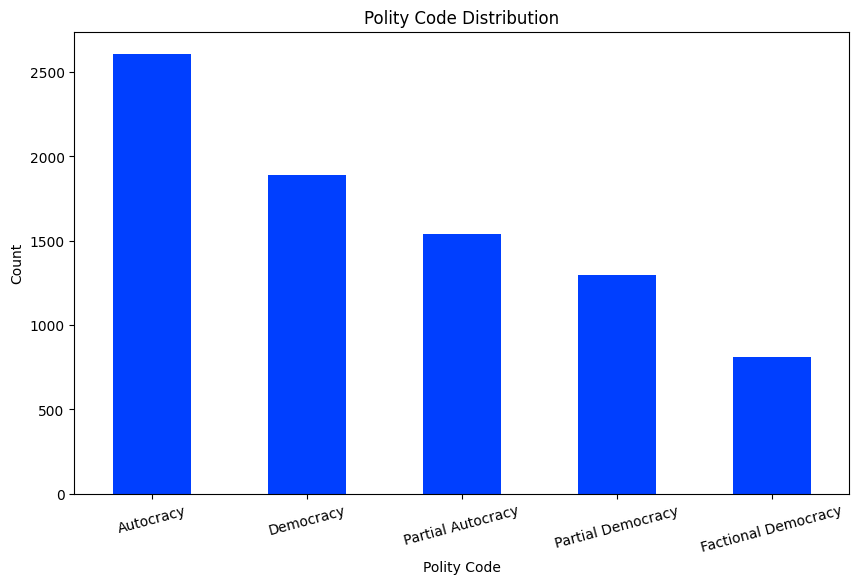

In [14]:
pol_code_labels = {
    'auc': 'Autocracy',
    'dem': 'Democracy',
    'pauc': 'Partial Autocracy',
    'pdem': 'Partial Democracy',
    'fdem': 'Factional Democracy'
}

pol_code_distribution = df['pol_code'].value_counts()

plt.figure(figsize=(10, 6))
ax = pol_code_distribution.plot(kind='bar')

ax.set_xticklabels([pol_code_labels.get(i, i) for i in pol_code_distribution.index])

plt.title('Polity Code Distribution')
plt.xlabel('Polity Code')
plt.ylabel('Count')
plt.xticks(rotation=15)
plt.show()

In [15]:
pol_code_onset_counts = df.groupby('pol_code')['ONSET'].sum()
pol_code_total_counts = df.groupby('pol_code')['ONSET'].count()
pol_code_onset_percent = (pol_code_onset_counts / pol_code_total_counts) * 100
print(pol_code_onset_percent)

pol_code
auc     2.376389
dem     0.317628
fdem    6.930693
pauc    2.794022
pdem    2.088167
Name: ONSET, dtype: float64


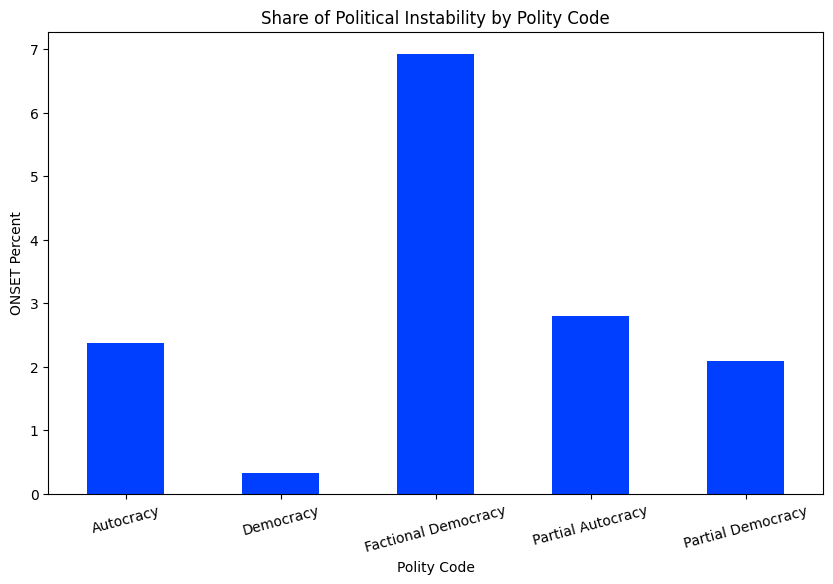

In [16]:
plt.figure(figsize=(10, 6))
ax = pol_code_onset_percent.plot(kind='bar')

ax.set_xticklabels([pol_code_labels.get(i, i) for i in pol_code_onset_percent.index])

plt.title('Share of Political Instability by Polity Code')
plt.xlabel('Polity Code')
plt.ylabel('ONSET Percent')
plt.xticks(rotation=15)
plt.show()

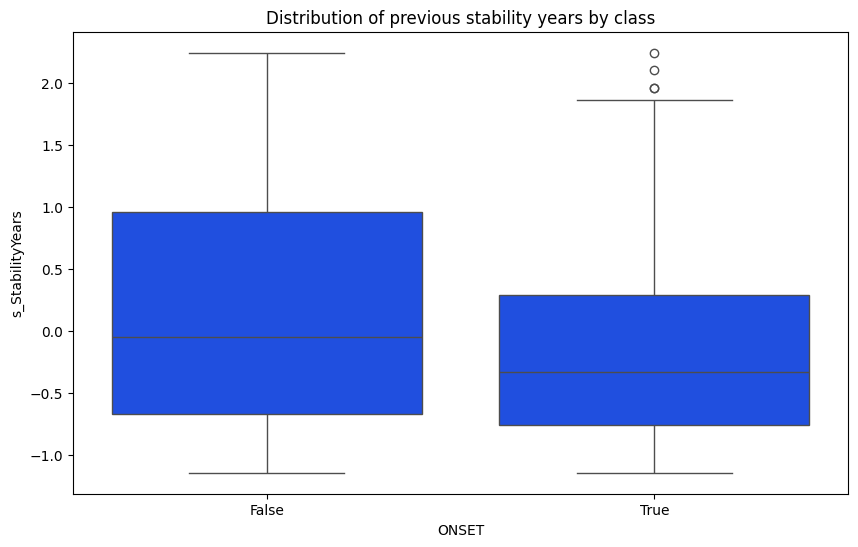

In [17]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='ONSET', y='s_StabilityYears', data=df)
plt.title('Distribution of previous stability years by class')
plt.show()

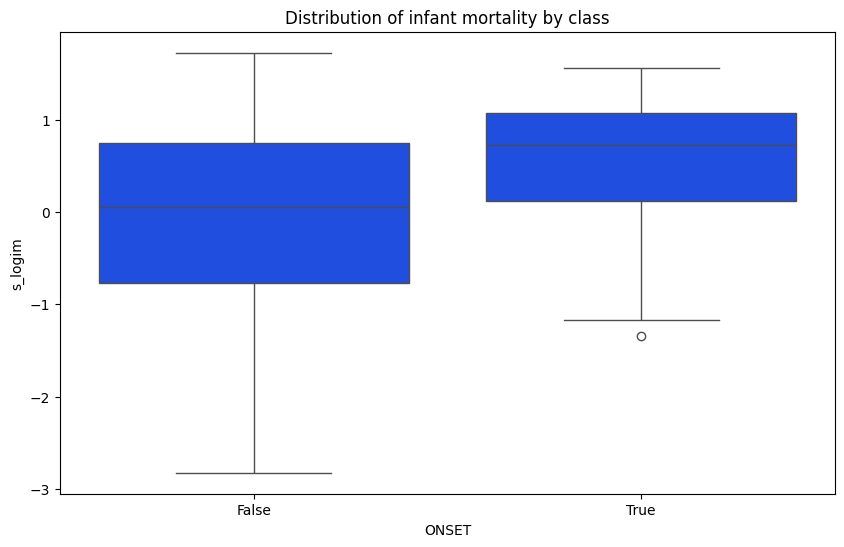

In [18]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='ONSET', y='s_logim', data=df)
plt.title('Distribution of infant mortality by class')
plt.show()

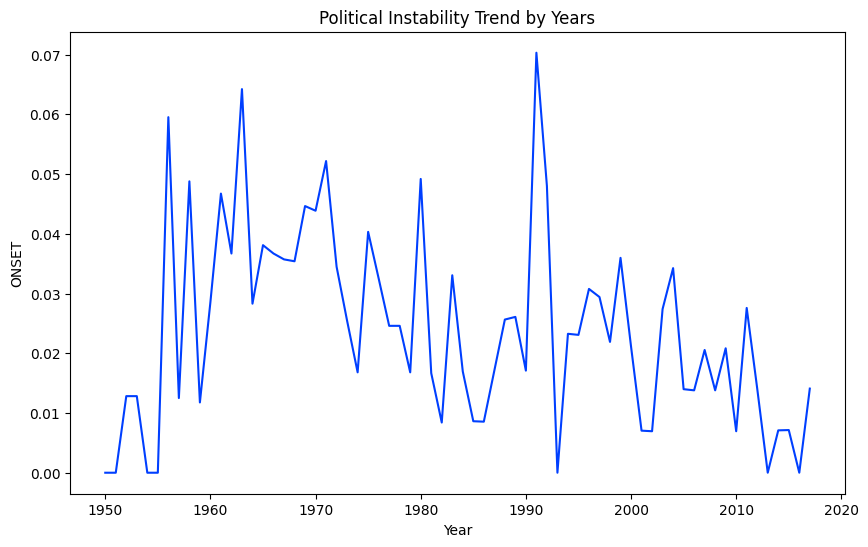

In [19]:
plt.figure(figsize=(10, 6))
df.groupby('EVENTYEAR')['ONSET'].mean().plot()

plt.title('Political Instability Trend by Years')
plt.xlabel('Year')
plt.ylabel('ONSET')

plt.savefig("political_instability_trend.png", dpi=600, bbox_inches='tight')
plt.show()

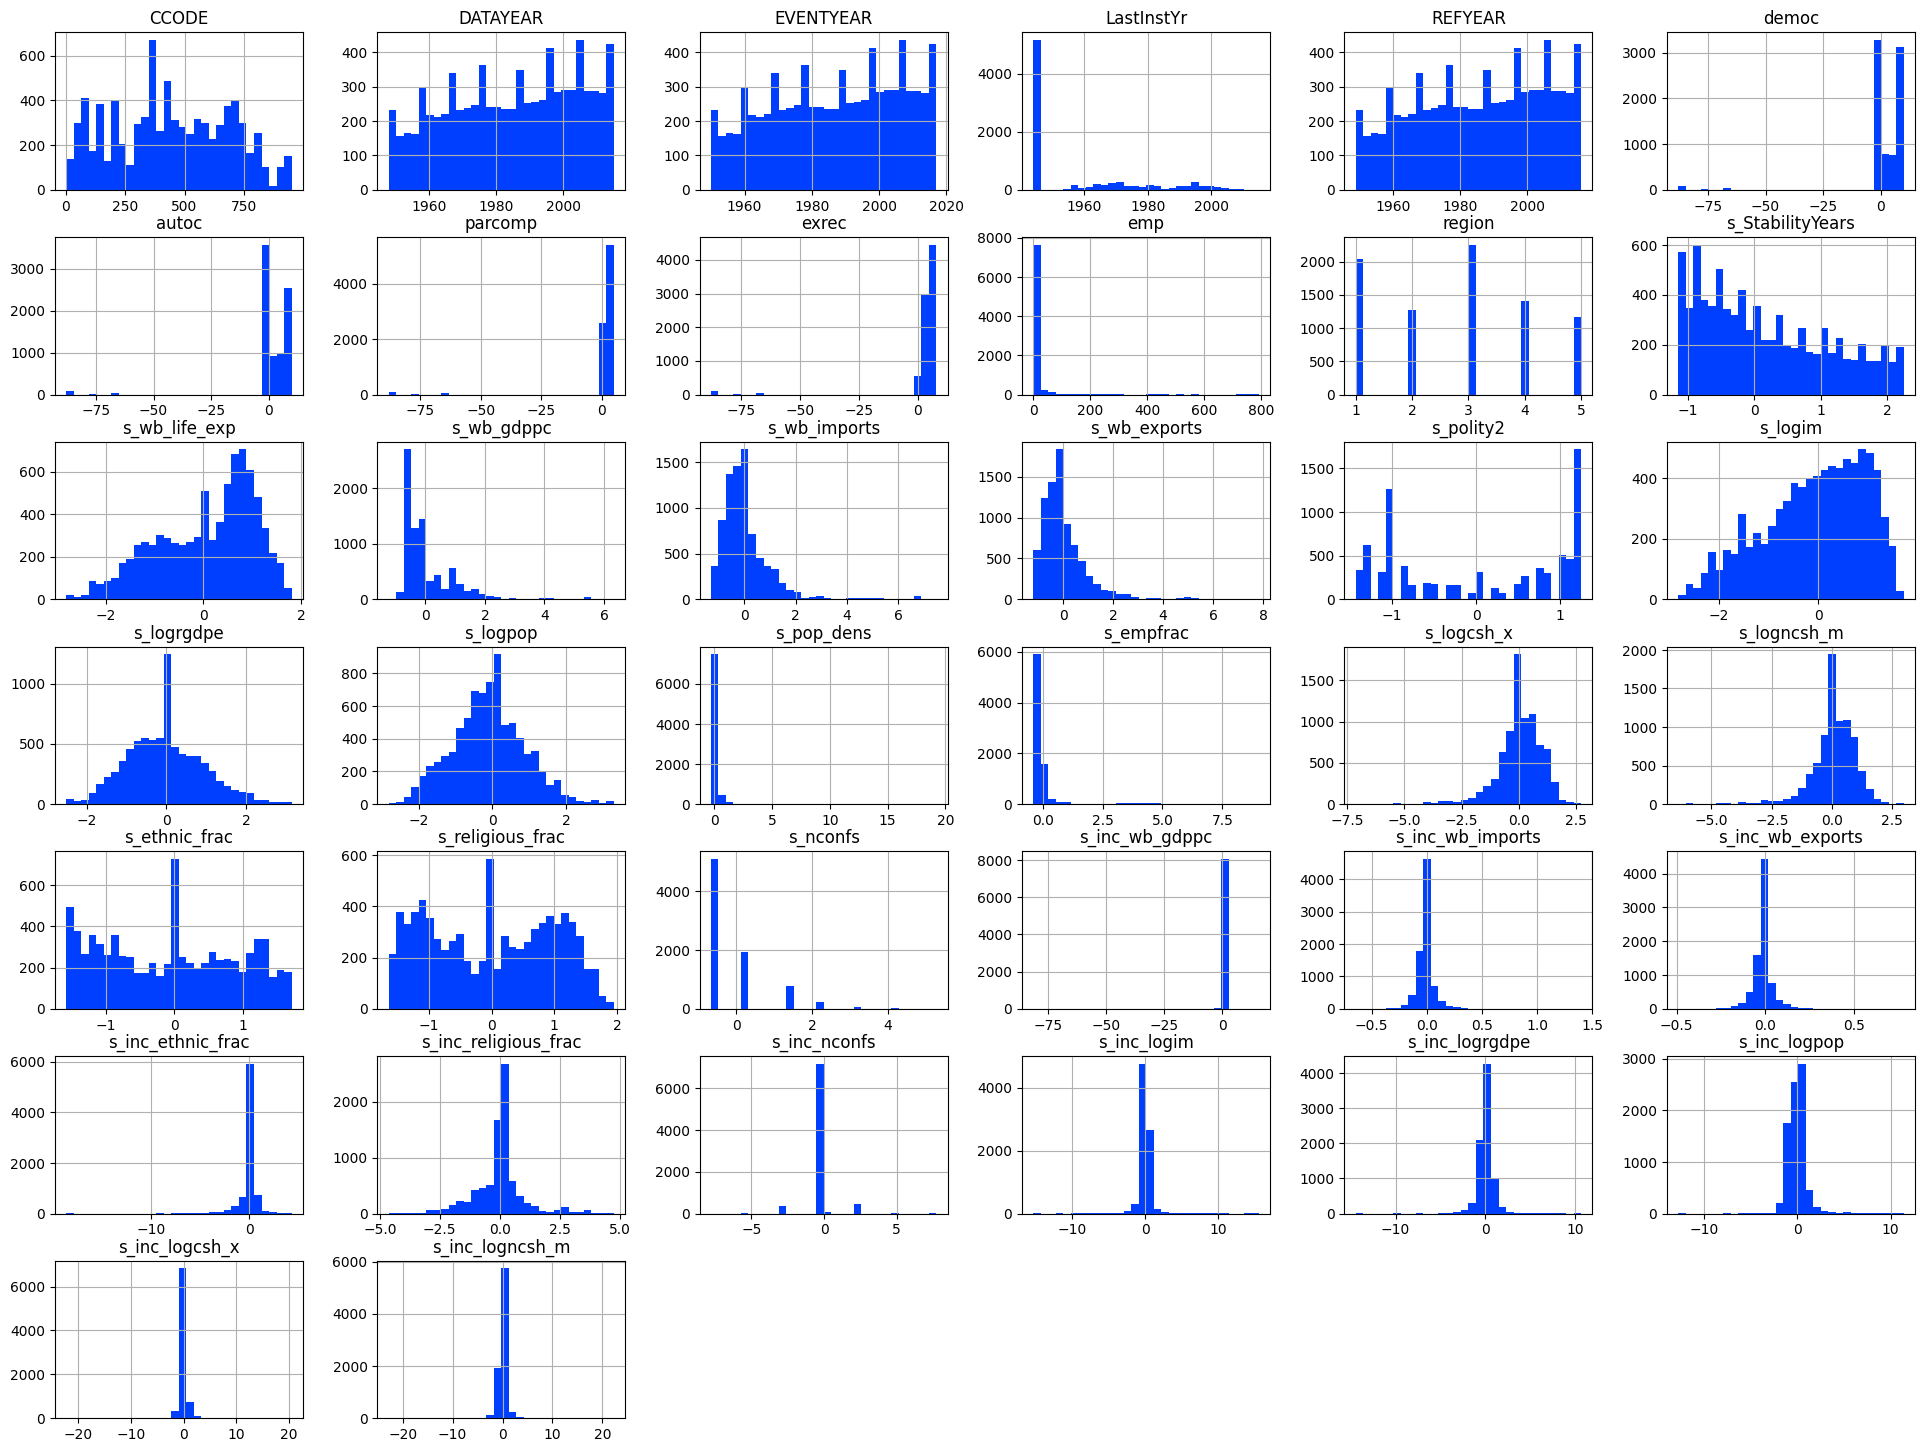

In [20]:
df.hist(bins=30, figsize=(24, 18))
plt.show()

# Preprocessing


In [21]:
columns = [
    # Identification features
    "CCODE",          # Country code
    "DATAYEAR",       # Year of data collection
    "REFYEAR",        # Year from where the prediction is made
    "EVENTYEAR",      # Year for which prediction is made
    "region",         # Region of the country

    # Political indicators
    "democ",          # Democracy score
    "autoc",          # Autocracy score
    "parcomp",        # Competitiveness of participation
    "exrec",          # Executive recruitment
    "s_polity2",      # Standardized polity2 score

    # Structural and economic indicators
    "s_wb_life_exp",  # Standardized life expectancy (World Bank)
    "s_wb_gdppc",     # Standardized GDP per capita (World Bank)
    "s_wb_imports",   # Standardized imports (World Bank)
    "s_wb_exports",   # Standardized exports (World Bank)
    "s_logim",        # Standardized log of infant mortality
    "s_logrgdpe",     # Standardized log of real GDP per capita
    "s_logpop",       # Standardized log of population
    "s_pop_dens",     # Standardized population density
    "s_empfrac",      # Standardized employment fraction
    "s_logcsh_x",     # Standardized log of share of exports in GDP
    "s_logncsh_m",    # Standardized log of share of imports in GDP
    "emp",            # Employment

    # Ethno-religious and conflict indicators
    "s_ethnic_frac",  # Standardized ethnic fractionalization
    "s_religious_frac", # Standardized religious fractionalization
    "s_nconfs",         # Standardized number of neighboring states with ongoing armed conflict.
    "nc1",              # True if 1 or more neighboring states have armed conflict.
    "nc2",              # True if 2 or more neighboring states have armed conflict.
    "nc3",              # True if 3 or more neighboring states have armed conflict.
    "nc4",              # True if 4 or more neighboring states have armed conflict.
    "nc5",              # True if 5 or more neighboring states have armed conflict.


    # Growth/change indicators
    "s_inc_wb_gdppc",     # Standardized increase in GDP per capita (World Bank)
    "s_inc_wb_imports",   # Standardized increase in imports (World Bank)
    "s_inc_wb_exports",   # Standardized increase in exports (World Bank)
    "s_inc_ethnic_frac",  # Standardized increase in ethnic fractionalization
    "s_inc_religious_frac", # Standardized increase in religious fractionalization
    "s_inc_nconfs",       # Standardized increase in number of conflicts
    "s_inc_logim",        # Standardized increase in log of infant mortality
    "s_inc_logrgdpe",     # Standardized increase in log of real GDP per capita
    "s_inc_logpop",       # Standardized increase in log of population
    "s_inc_logcsh_x",     # Standardized increase in log of share of exports in GDP
    "s_inc_logncsh_m",    # Standardized increase in log of share of imports in GDP

    # Historical stability
    "s_StabilityYears",   # Standardized number of years of stability
    "LastInstYr"          # Last year of instability (if in the past)
]

pol_code one-hot encoding

In [22]:
df = pd.get_dummies(df, columns=['pol_code'], dtype=float)
pol_code_dummies = [col for col in df.columns if col.startswith('pol_code_')]

Function for validation strategy

In [23]:
def expanding_window_validation(df, train_start_year=1949, start_year=2000, end_year=2016):
    splits = []

    for year in range(start_year, end_year + 1):

        train_idx = df[(df['REFYEAR'] >= train_start_year) & (df['REFYEAR'] < year)].index
        test_idx = df[df['REFYEAR'] == year].index

        splits.append((train_idx, test_idx))

        print(f"Train from: {train_start_year} until: {year-1}, Test year: {year}, Event year: {year+1}, Train samples: {len(train_idx)}, Test samples: {len(test_idx)}")

    return splits

splits = expanding_window_validation(df)

Train from: 1949 until: 1999, Test year: 2000, Event year: 2001, Train samples: 5701, Test samples: 142
Train from: 1949 until: 2000, Test year: 2001, Event year: 2002, Train samples: 5843, Test samples: 144
Train from: 1949 until: 2001, Test year: 2002, Event year: 2003, Train samples: 5987, Test samples: 146
Train from: 1949 until: 2002, Test year: 2003, Event year: 2004, Train samples: 6133, Test samples: 146
Train from: 1949 until: 2003, Test year: 2004, Event year: 2005, Train samples: 6279, Test samples: 143
Train from: 1949 until: 2004, Test year: 2005, Event year: 2006, Train samples: 6422, Test samples: 145
Train from: 1949 until: 2005, Test year: 2006, Event year: 2007, Train samples: 6567, Test samples: 146
Train from: 1949 until: 2006, Test year: 2007, Event year: 2008, Train samples: 6713, Test samples: 145
Train from: 1949 until: 2007, Test year: 2008, Event year: 2009, Train samples: 6858, Test samples: 144
Train from: 1949 until: 2008, Test year: 2009, Event year: 2010,

Function for training and evaluating model

In [24]:
def evaluate_model(X, y, model, splits, plot_results=True):
    roc_auc_scores = []
    auprc_scores = []
    yearly_results = []
    models_by_year = {}
    X_test_by_year = {}
    y_test_by_year = {}

    for train_idx, test_idx in tqdm(splits, desc="Evaluating model", unit="split"):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        year = int(X_test['REFYEAR'].iloc[0])

        if len(np.unique(y_test)) == 1:
            print(f"Skipping year {year} due to only one class in the test set.")
            continue

        X_train_features = X_train.drop(columns=['CCODE', 'REFYEAR'], errors='ignore')
        X_test_features = X_test.drop(columns=['CCODE', 'REFYEAR'], errors='ignore')

        model.fit(X_train_features, y_train)
        y_pred_proba = model.predict_proba(X_test_features)[:, 1]
        y_pred = model.predict(X_test_features)

        roc_auc_scores.append(roc_auc_score(y_test, y_pred_proba))
        auprc_scores.append(average_precision_score(y_test, y_pred_proba))

        yearly_results.append({
            'Year': year,
            'ROC-AUC': roc_auc_scores[-1],
            'AUPRC': auprc_scores[-1]
        })

        models_by_year[year] = model
        X_test_by_year[year] = X_test
        y_test_by_year[year] = y_test

    mean_roc_auc = np.mean(roc_auc_scores)
    std_roc_auc = np.std(roc_auc_scores)
    mean_auprc = np.mean(auprc_scores)
    std_auprc = np.std(auprc_scores)

    print("\nResults:")
    print(f"Mean ROC-AUC: {mean_roc_auc:.3f} ± {std_roc_auc:.3f}")
    print(f"Mean AUPRC: {mean_auprc:.3f} ± {std_auprc:.3f}")

    if plot_results:
        results_df = pd.DataFrame(yearly_results).sort_values('Year')
        fig, axes = plt.subplots(1, 2, figsize=(14, 5))

        years = results_df['Year'].astype(int)
        for i, metric in enumerate(['ROC-AUC', 'AUPRC']):
            axes[i].bar(years, results_df[metric], color='blue' if metric == 'ROC-AUC' else 'red')
            axes[i].set_title(f'{metric} by years')
            axes[i].set_xlabel('Year')
            axes[i].set_ylabel(metric)
            axes[i].set_ylim(0, 1)
            axes[i].set_xticks(years)
            axes[i].set_xticklabels(years, rotation=30, ha='right')

        plt.tight_layout()
        plt.show()

    return mean_auprc, models_by_year, X_test_by_year, y_test_by_year

# One-year model

In [25]:
selected_features = ['CCODE', 'REFYEAR', 's_StabilityYears',
                     's_logim', 'nc4'] + pol_code_dummies

In [26]:
X = df[selected_features]
y = df['ONSET']

Evaluating model: 100%|██████████| 17/17 [00:00<00:00, 63.37split/s]


Skipping year 2012 due to only one class in the test set.
Skipping year 2015 due to only one class in the test set.

Results:
Mean ROC-AUC: 0.761 ± 0.141
Mean AUPRC: 0.166 ± 0.250


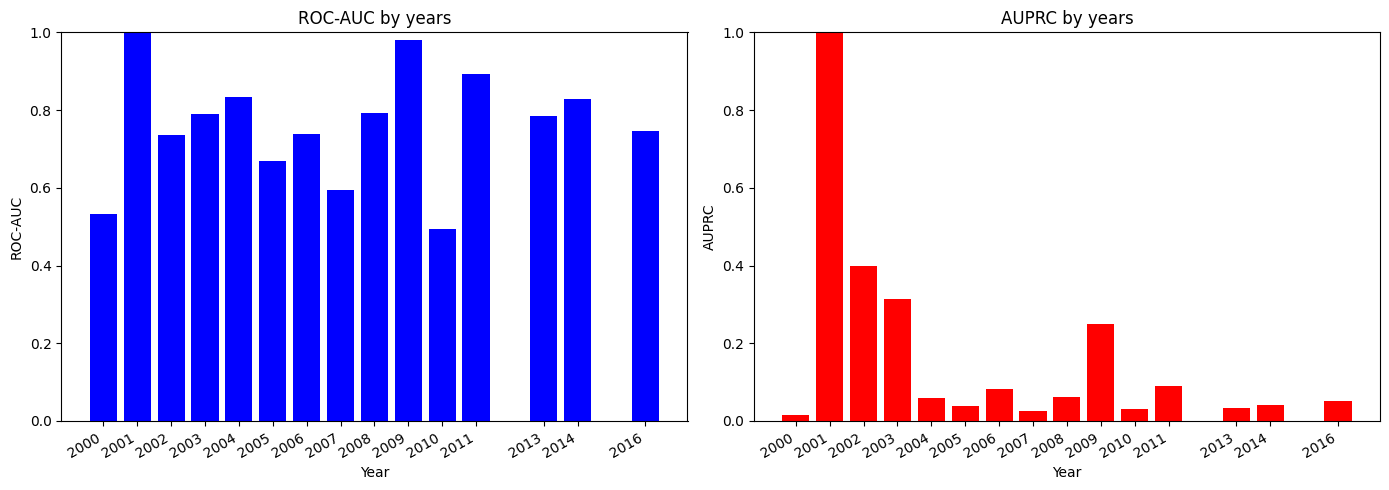

In [27]:
lr = LogisticRegression(
    max_iter=5000,
    solver='liblinear',
    class_weight='balanced',
    random_state=42
)

mean_auprc, models_by_year, X_test_by_year, y_test_by_year = evaluate_model(X, y, lr, splits)

# Feature importance analysis

Global analysis

Coefficients:
             Feature  Coefficient  Abs Importance  Odds Ratio
2               nc4     1.369083        1.369083    3.931742
4      pol_code_dem    -1.245447        1.245447    0.287812
5     pol_code_fdem     1.152021        1.152021    3.164581
1           s_logim     0.704683        0.704683    2.023205
3      pol_code_auc    -0.219180        0.219180    0.803177
7     pol_code_pdem     0.097890        0.097890    1.102841
6     pol_code_pauc    -0.032041        0.032041    0.968466
0  s_StabilityYears    -0.031690        0.031690    0.968807


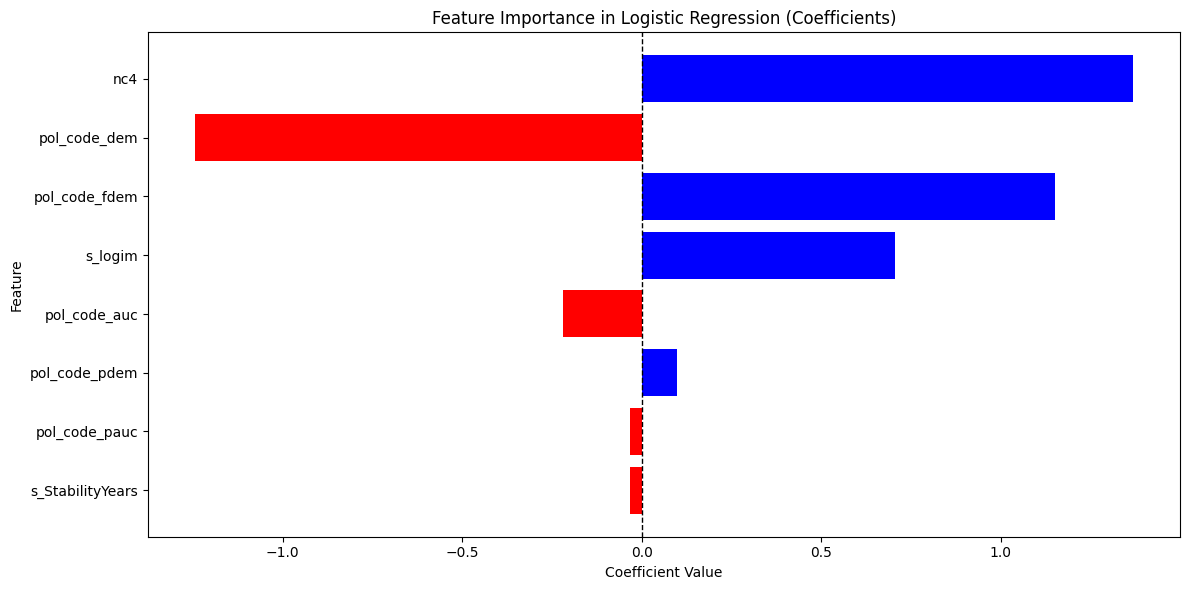

In [28]:
coefficients = lr.coef_[0]
feature_names = X.drop(['REFYEAR', 'CCODE'], axis=1).columns

feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients,
    'Abs Importance': np.abs(coefficients),
    'Odds Ratio': np.exp(coefficients)
}).sort_values(by='Abs Importance', ascending=False)

print("Coefficients:\n", feature_importance)

plt.figure(figsize=(12, 6))
colors = ['blue' if coef >= 0 else 'red' for coef in feature_importance['Coefficient']]
plt.barh(feature_importance['Feature'], feature_importance['Coefficient'], color=colors)
plt.axvline(x=0, color='black', linestyle='--', linewidth=1)
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Feature Importance in Logistic Regression (Coefficients)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('coef_importance.png')
plt.show()

Local analysis

In [29]:
def analyze_specific_instance(ccode, refyear, models_by_year, X_test_by_year, y_test_by_year):

    if refyear not in X_test_by_year:
        print(f"Data for {refyear} not found.")
        return

    X_test = X_test_by_year[refyear]
    y_test = y_test_by_year[refyear]
    model = models_by_year[refyear]

    instance = X_test[(X_test['CCODE'] == ccode) & (X_test['REFYEAR'] == refyear)]

    if instance.empty:
        print(f"Instance for country {ccode} in {refyear} not found.")
        return

    instance_idx = instance.index[0]
    instance_loc = X_test.index.get_loc(instance_idx)

    X_test_features = X_test.drop(columns=['CCODE', 'REFYEAR'], errors='ignore')

    explainer = shap.LinearExplainer(model, X_test_features)
    shap_values = explainer(X_test_features)

    y_pred_proba = model.predict_proba(X_test_features.iloc[[instance_loc]])[:, 1][0]
    y_pred = model.predict(X_test_features.iloc[[instance_loc]])[0]
    y_true = y_test.loc[instance_idx]

    print(f"Country: {ccode}, Year: {refyear}")
    print(f"Political instability probability: {y_pred_proba:.3f}")
    print(f"ONSET prediction: {y_pred}")
    print(f"ONSET true: {y_true}")

    feature_names = X_test_features.columns
    instance_features = X_test_features.iloc[instance_loc]
    instance_shap_values = shap_values[instance_loc].values

    shap_df = pd.DataFrame({
        'Feature': feature_names,
        'Feature Value': instance_features.values,
        'SHAP Value': instance_shap_values
    }).sort_values(by='SHAP Value', key=abs, ascending=False)

    print("\nSHAP Analysis Table:")
    print(shap_df.head(10).to_string(index=False))

    shap.plots.waterfall(shap_values[instance_loc], max_display=10)
    plt.title(f"SHAP Waterfall Plot for country {ccode} in {refyear}")
    plt.tight_layout()
    plt.close()

Pakistan, 2004 analysis

Country: 770, Year: 2003
Political instability probability: 0.827
ONSET prediction: True
ONSET true: True

SHAP Analysis Table:
         Feature Feature Value SHAP Value
             nc4          True   1.355392
         s_logim      0.628767   0.738727
    pol_code_dem           0.0   0.323816
   pol_code_fdem           0.0  -0.149763
s_StabilityYears     -0.999231   0.051185
   pol_code_pdem           0.0  -0.024472
    pol_code_auc           0.0    0.02411
   pol_code_pauc           1.0  -0.024031


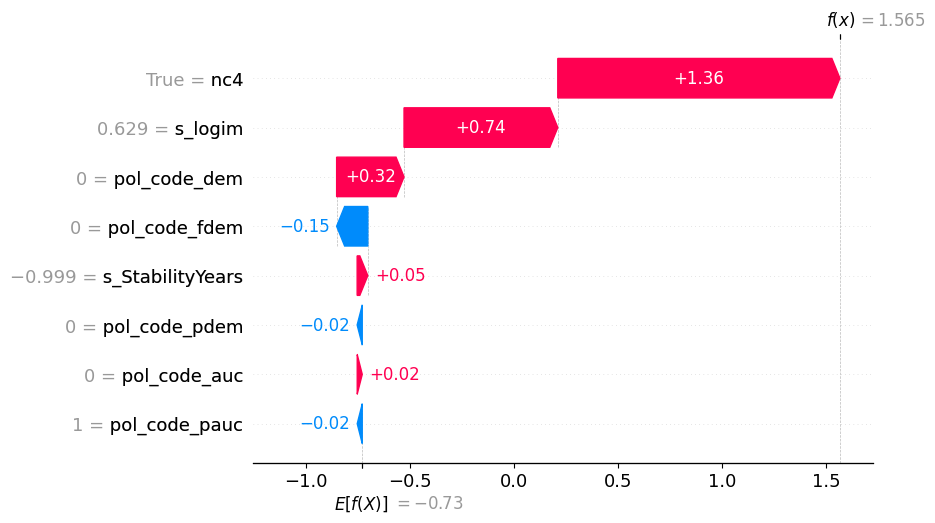

In [30]:
analyze_specific_instance(ccode=770, refyear=2003,
                         models_by_year=models_by_year,
                         X_test_by_year=X_test_by_year,
                         y_test_by_year=y_test_by_year)

Venezuela, 2016 analysis

Country: 101, Year: 2016
Political instability probability: 0.570
ONSET prediction: True
ONSET true: True

SHAP Analysis Table:
         Feature Feature Value SHAP Value
   pol_code_fdem           1.0   1.013778
    pol_code_dem           0.0   0.286453
         s_logim     -0.783527   0.128631
s_StabilityYears      2.242553  -0.037996
   pol_code_pdem           0.0  -0.036219
    pol_code_auc           0.0   0.028493
             nc4         False  -0.013691
   pol_code_pauc           0.0   0.004806


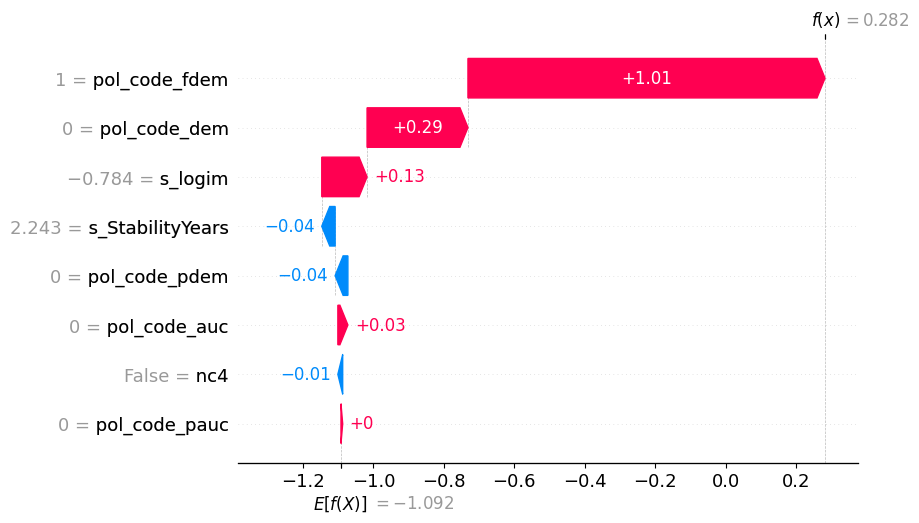

In [31]:
analyze_specific_instance(ccode=101, refyear=2016,
                         models_by_year=models_by_year,
                         X_test_by_year=X_test_by_year,
                         y_test_by_year=y_test_by_year)

# Two-year model


In [32]:
X = df[selected_features]
y = df['INST_2YR']

Evaluating model: 100%|██████████| 17/17 [00:00<00:00, 41.39split/s]



Results:
Mean ROC-AUC: 0.771 ± 0.090
Mean AUPRC: 0.150 ± 0.164


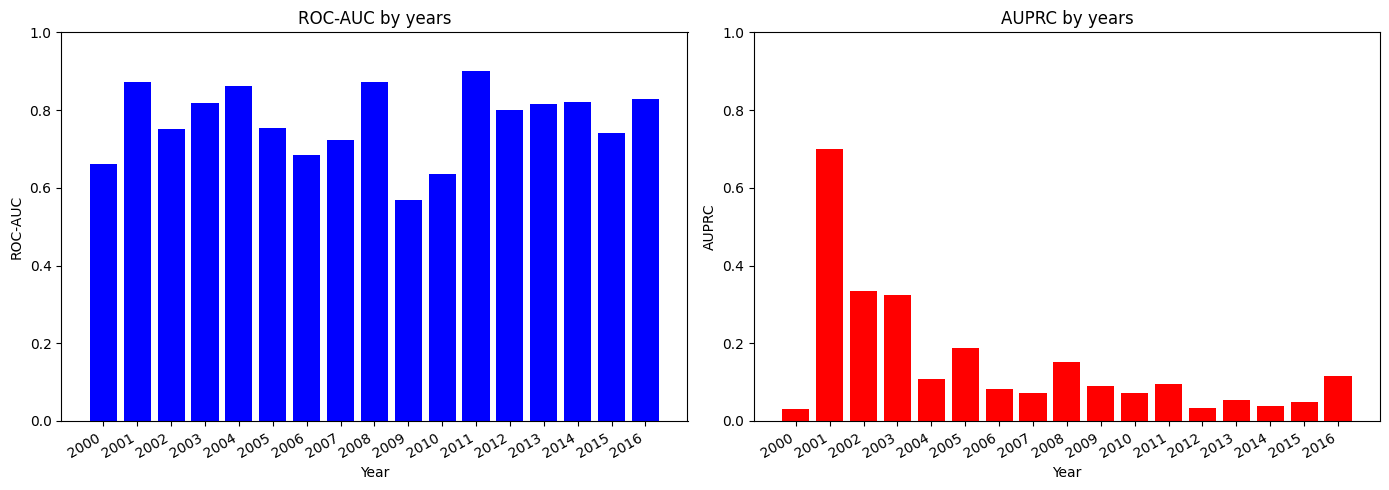

In [33]:
lr = LogisticRegression(
    max_iter=5000,
    solver='liblinear',
    class_weight='balanced',
    random_state=42
)

mean_auprc, models_by_year, X_test_by_year, y_test_by_year = evaluate_model(X, y, lr, splits)

# Five-year model

In [34]:
X = df[selected_features]
y = df['INST_5YR']

Evaluating model: 100%|██████████| 17/17 [00:00<00:00, 37.70split/s]



Results:
Mean ROC-AUC: 0.766 ± 0.062
Mean AUPRC: 0.190 ± 0.092


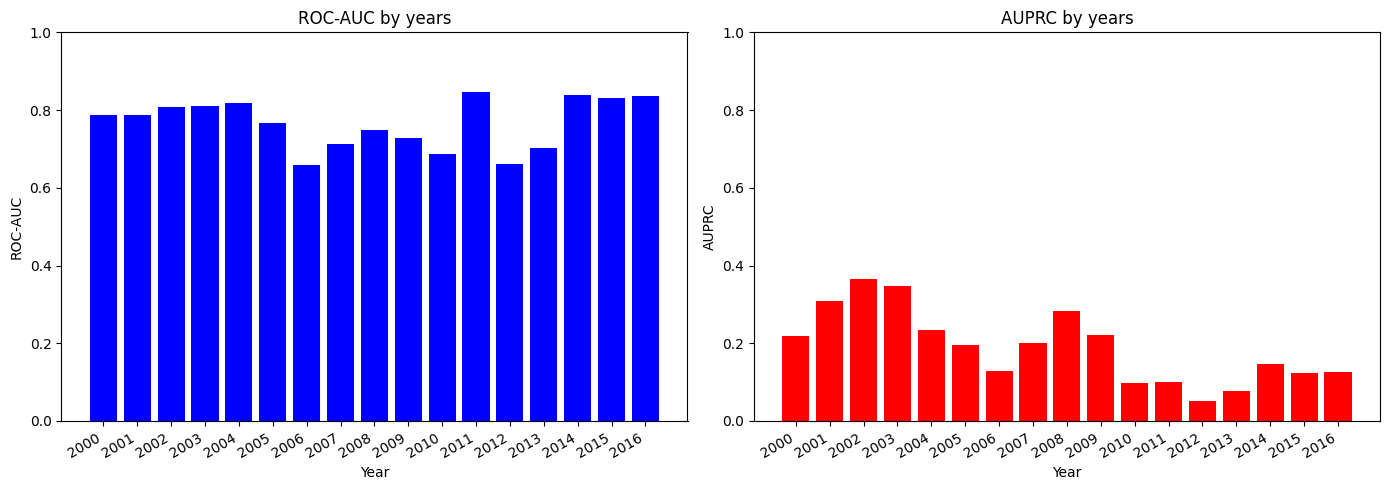

In [35]:
lr = LogisticRegression(
    max_iter=5000,
    solver='liblinear',
    class_weight='balanced',
    random_state=42
)

mean_auprc, models_by_year, X_test_by_year, y_test_by_year = evaluate_model(X, y, lr, splits)